### Ch17 Figure7

In [1]:
# I once worked for an organization that was trying to figure out why more men than women were participating in their medical studies. They got a report from the labs that men were 60% more likely to participate in a medical study. The data science team was tasked with trying to figure out why this was the case.

data = []

for i in range(5000):
    
    if rd.random() <= .4:
        gender = 'male'
    else:
        gender = 'female'
    
    if gender == 'male':
        if rd.random() <= .8:
            tested = 'Y'
        else:
            tested = 'N'
    else:
        if rd.random () <= .3:
            tested = 'Y'
        else:
            tested = 'N'
    data.append([i, gender, tested])

df = pd.DataFrame(data, columns=['id', 'gender', 'test taker'])
# df.to_csv('csv_output/ch17_fig6.csv', index=False)
df = pd.read_csv('csv_output/ch17_fig7.csv')
df.head()

,id,gender,test taker
0,0,male,Y
1,1,female,Y
2,2,male,N
3,3,female,Y
4,4,female,N


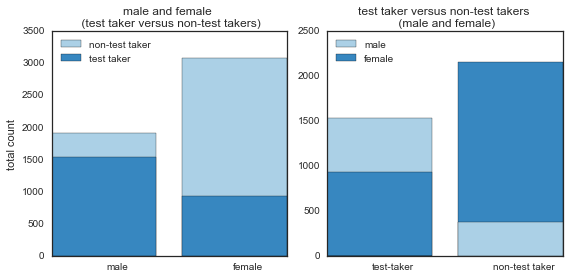

In [2]:
df = pd.read_csv('csv_output/ch17_fig7.csv')

%matplotlib inline
sns.set_style("white")
cm = sns.color_palette('Blues', 2)

f, ax = plt.subplots(1,2, figsize=(8,4))
ax1 = ax[1]
ax = ax[0]

dgb = df.groupby(['gender', 'test taker']).id.count().reset_index().sort_values('id', ascending=False)
# print(dgb[(dgb['took test'] == 'Y') & (dgb['gender']=='male')].id.values / dgb[(dgb['took test'] == 'Y') & (dgb['gender']=='female')].id.values)
ax.bar(left= np.arange(2), height=[dgb[dgb['gender']=='male'].id.sum(), dgb[dgb['gender']=='female'].id.sum()], color=cm[0]);
ax.bar(left= np.arange(2), height=[dgb[(dgb['gender']=='male') & (dgb['test taker']=='Y')].id.sum(), dgb[(dgb['gender']=='female') & (dgb['test taker']=='Y')].id.sum()], color=cm[1]);

ax.legend(['non-test taker', 'test taker'], loc='upper left')
ax.set_title('male and female \n (test taker versus non-test takers)')
ax.set_xticks(np.arange(2)+.5);
ax.set_xticklabels(['male', 'female'])
ax.set_ylabel('total count')

ax1.bar(left=np.arange(2), height=[dgb[(dgb['gender']=='male') & (dgb['test taker']=='Y')].id.sum(), 0], color=cm[0])
ax1.bar(left=np.arange(2), height=[dgb[(dgb['gender']=='female') & (dgb['test taker']=='Y')].id.sum(), 0], color=cm[1])
ax1.bar(left=np.arange(2), height=[0, dgb[(dgb['gender']=='female') & (dgb['test taker']=='N')].id.sum()], color=cm[1])
ax1.bar(left=np.arange(2), height=[0, dgb[(dgb['gender']=='male') & (dgb['test taker']=='N')].id.sum()], color=cm[0])

ax1.set_xticks(np.arange(2)+.5);
ax1.set_xticklabels(['test-taker', 'non-test taker'])
ax1.set_title('test taker versus non-test takers \n (male and female)');
ax1.legend(['male', 'female'], loc='upper left')

f.tight_layout()
f.savefig('svg_output/ch17_fig7.svg', format='svg')

We can pivot the table two ways, on the left is by male and female, about 80% of male are test takers versus only 30% of female are test takers. On the right is by test takers and non-test takers, 60% of test takers are male versus only 15% of non-test takers are male.